# 🧪 Taller CNN con TensorFlow - Exploración de Datos

Este notebook implementa paso a paso una Red Neuronal Convolucional (CNN) para clasificación de imágenes usando **TensorFlow/Keras**.

## 📋 Objetivos
1. Cargar y explorar el dataset CIFAR-10
2. Visualizar muestras de datos
3. Preparar los datos para el entrenamiento
4. Entender la estructura del dataset

## 🛠️ Tecnologías
- **TensorFlow/Keras** - Framework principal
- **NumPy** - Manipulación de arrays
- **Matplotlib** - Visualización
- **Scikit-learn** - Métricas de evaluación

## 1. Importar Librerías Necesarias

Primero importamos todas las librerías que necesitaremos para el proyecto.

In [3]:
# Importar librerías principales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import warnings

# Configuración de warnings y random seeds para reproducibilidad
warnings.filterwarnings('ignore')
tf.random.set_seed(42)
np.random.seed(42)

# Configuración de matplotlib
plt.style.use('default')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"GPU disponible: {len(tf.config.list_physical_devices('GPU')) > 0}")

TensorFlow version: 2.19.0
Keras version: 3.10.0
GPU disponible: False


## 2. Cargar y Explorar el Dataset CIFAR-10

CIFAR-10 es un dataset muy popular para clasificación de imágenes que contiene:
- **60,000 imágenes** RGB de 32x32 píxeles
- **10 clases**: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco, camión
- **50,000 imágenes de entrenamiento** y **10,000 de prueba**

In [4]:
# Cargar dataset CIFAR-10
print("Cargando dataset CIFAR-10...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Nombres de las clases en CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Información básica del dataset
print(f"\n📊 Información del Dataset:")
print(f"Imágenes de entrenamiento: {x_train.shape}")
print(f"Etiquetas de entrenamiento: {y_train.shape}")
print(f"Imágenes de prueba: {x_test.shape}")
print(f"Etiquetas de prueba: {y_test.shape}")
print(f"Número de clases: {len(class_names)}")
print(f"Rango de píxeles: {x_train.min()} - {x_train.max()}")
print(f"Tipo de datos: {x_train.dtype}")

# Distribución de clases en entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
print(f"\n📈 Distribución de clases en entrenamiento:")
for i, (class_idx, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[class_idx]}: {count} imágenes")

Cargando dataset CIFAR-10...

📊 Información del Dataset:
Imágenes de entrenamiento: (50000, 32, 32, 3)
Etiquetas de entrenamiento: (50000, 1)
Imágenes de prueba: (10000, 32, 32, 3)
Etiquetas de prueba: (10000, 1)
Número de clases: 10
Rango de píxeles: 0 - 255
Tipo de datos: uint8

📈 Distribución de clases en entrenamiento:
avión: 5000 imágenes
automóvil: 5000 imágenes
pájaro: 5000 imágenes
gato: 5000 imágenes
ciervo: 5000 imágenes
perro: 5000 imágenes
rana: 5000 imágenes
caballo: 5000 imágenes
barco: 5000 imágenes
camión: 5000 imágenes


## 3. Visualizar Muestras del Dataset

Vamos a visualizar algunas imágenes de ejemplo para entender mejor nuestros datos.

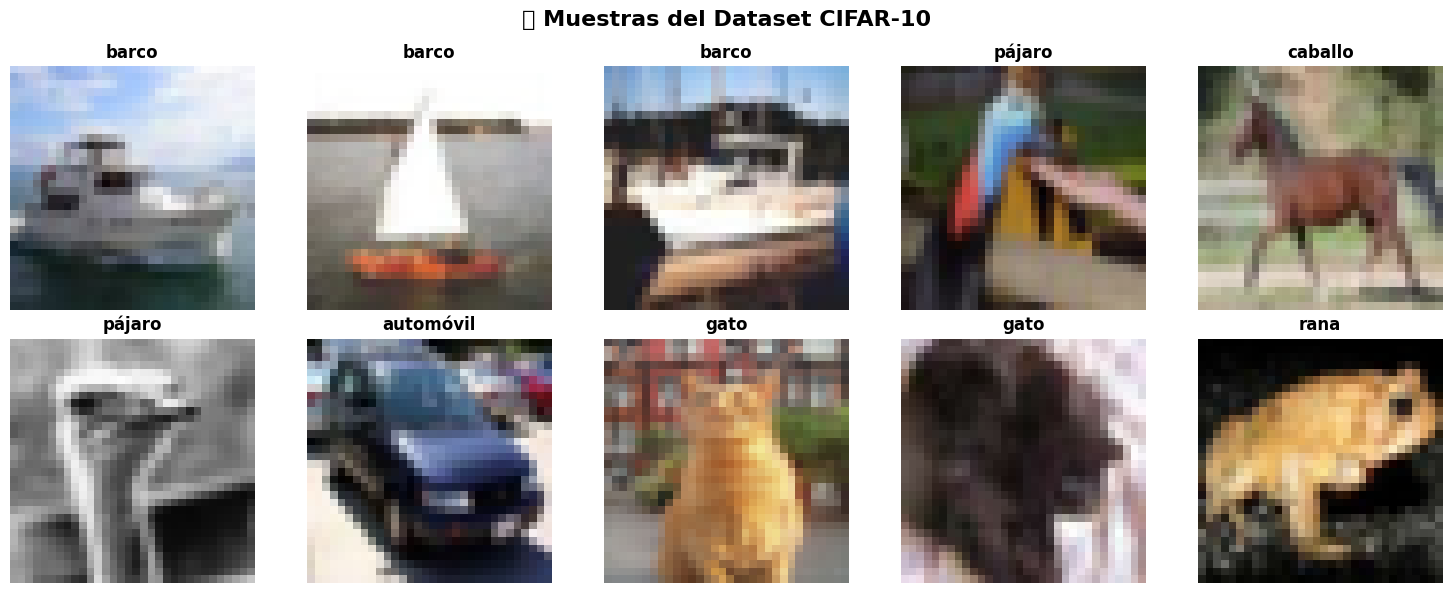

In [5]:
# Función para visualizar imágenes de muestra
def plot_sample_images(x_data, y_data, class_names, num_samples=10):
    """Visualiza muestras de imágenes del dataset"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('🖼️ Muestras del Dataset CIFAR-10', fontsize=16, fontweight='bold')
    
    for i in range(num_samples):
        row = i // 5
        col = i % 5
        
        # Seleccionar una imagen aleatoria
        idx = np.random.randint(0, len(x_data))
        img = x_data[idx]
        label = y_data[idx][0]
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(f'{class_names[label]}', fontweight='bold')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualizar muestras
plot_sample_images(x_train, y_train, class_names)

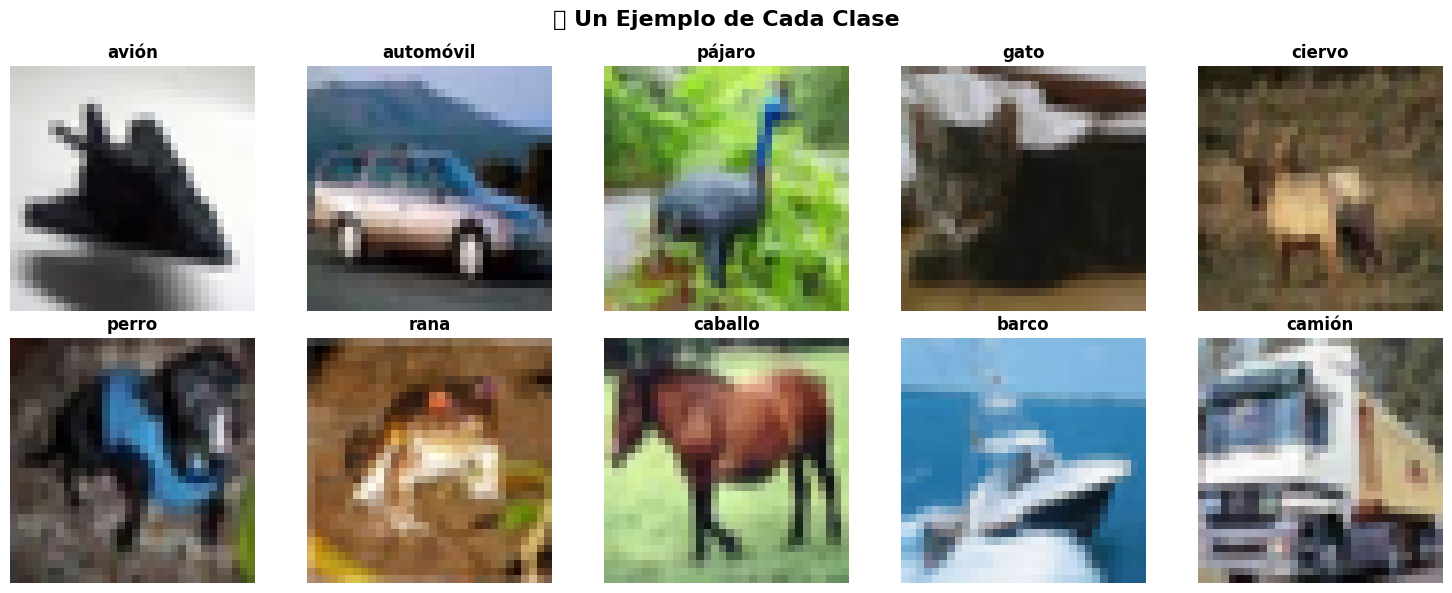

In [6]:
# Mostrar un ejemplo de cada clase
def plot_one_of_each_class(x_data, y_data, class_names):
    """Muestra un ejemplo de cada clase"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('🎯 Un Ejemplo de Cada Clase', fontsize=16, fontweight='bold')
    
    for class_idx in range(10):
        row = class_idx // 5
        col = class_idx % 5
        
        # Encontrar la primera imagen de esta clase
        idx = np.where(y_data == class_idx)[0][0]
        img = x_data[idx]
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(f'{class_names[class_idx]}', fontweight='bold')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_one_of_each_class(x_train, y_train, class_names)

## 4. Preprocesamiento de Datos

Antes de entrenar nuestro modelo CNN, necesitamos:
1. **Normalizar** los píxeles al rango [0, 1]
2. **Convertir** las etiquetas a codificación one-hot
3. **Validar** que los datos estén listos para el entrenamiento

In [7]:
# 1. Normalizar píxeles al rango [0, 1]
print("🔄 Preprocesando datos...")

# Convertir a float32 y normalizar
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

print(f"Rango de píxeles después de normalización: {x_train_norm.min():.1f} - {x_train_norm.max():.1f}")

# 2. Convertir etiquetas a one-hot encoding
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

print(f"Forma de etiquetas originales: {y_train.shape}")
print(f"Forma de etiquetas one-hot: {y_train_onehot.shape}")

# 3. Mostrar ejemplo de transformación
print(f"\n📋 Ejemplo de transformación:")
print(f"Etiqueta original: {y_train[0][0]} ({class_names[y_train[0][0]]})")
print(f"Etiqueta one-hot: {y_train_onehot[0]}")

# 4. Verificar las formas finales
print(f"\n✅ Datos listos para entrenamiento:")
print(f"X_train: {x_train_norm.shape}")
print(f"y_train: {y_train_onehot.shape}")
print(f"X_test: {x_test_norm.shape}")
print(f"y_test: {y_test_onehot.shape}")

🔄 Preprocesando datos...
Rango de píxeles después de normalización: 0.0 - 1.0
Forma de etiquetas originales: (50000, 1)
Forma de etiquetas one-hot: (50000, 10)

📋 Ejemplo de transformación:
Etiqueta original: 6 (rana)
Etiqueta one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

✅ Datos listos para entrenamiento:
X_train: (50000, 32, 32, 3)
y_train: (50000, 10)
X_test: (10000, 32, 32, 3)
y_test: (10000, 10)


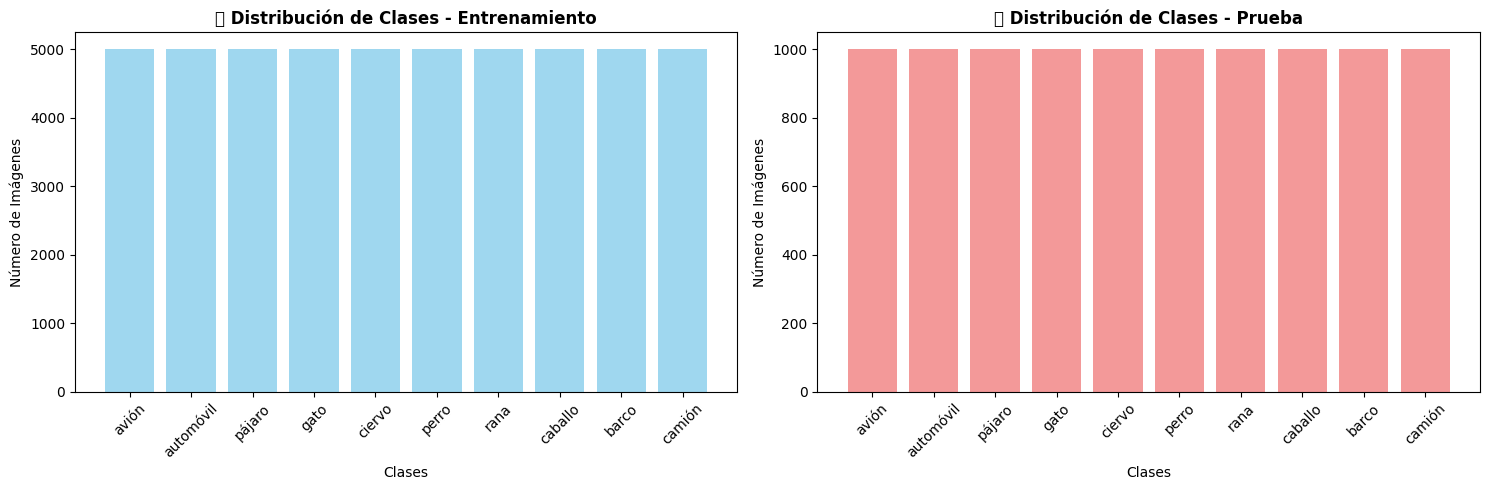

✅ Dataset balanceado: Todas las clases tienen la misma cantidad de imágenes


In [8]:
# Visualizar distribución de clases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Distribución en entrenamiento
unique_train, counts_train = np.unique(y_train, return_counts=True)
ax1.bar([class_names[i] for i in unique_train], counts_train, color='skyblue', alpha=0.8)
ax1.set_title('📊 Distribución de Clases - Entrenamiento', fontweight='bold')
ax1.set_xlabel('Clases')
ax1.set_ylabel('Número de Imágenes')
ax1.tick_params(axis='x', rotation=45)

# Distribución en prueba
unique_test, counts_test = np.unique(y_test, return_counts=True)
ax2.bar([class_names[i] for i in unique_test], counts_test, color='lightcoral', alpha=0.8)
ax2.set_title('📊 Distribución de Clases - Prueba', fontweight='bold')
ax2.set_xlabel('Clases')
ax2.set_ylabel('Número de Imágenes')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Verificar que el dataset esté balanceado
print("✅ Dataset balanceado: Todas las clases tienen la misma cantidad de imágenes")

## 📋 Resumen de la Exploración

### ✅ Lo que hemos logrado:
1. **Cargamos** el dataset CIFAR-10 exitosamente
2. **Exploramos** la estructura: 50K entrenamiento + 10K prueba
3. **Visualizamos** muestras de cada clase
4. **Normalizamos** los píxeles al rango [0, 1]
5. **Convertimos** etiquetas a one-hot encoding
6. **Verificamos** que el dataset está balanceado

### 🎯 Datos finales listos para CNN:
- **Imágenes**: 32x32x3 (RGB) normalizadas
- **Clases**: 10 categorías balanceadas
- **Formato**: Listo para TensorFlow/Keras

### 📈 Próximos pasos:
En el siguiente notebook construiremos y entrenaremos nuestra CNN con estos datos preprocesados.